In [6]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex1():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_small")
    for index, instance in enumerate(instances):
        ig = IteratedGreedy(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 100000
        ig.eval(40000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/IG_vrf_small_ML1e5_RT40S.csv')

In [ ]:
from scipy import stats
from scipy.stats import norm, skew
data = pd.read_csv ("GA_et_MG10000_P30_CR80_MR15_RT20S.csv")
ERR_up = np.array (data['err_up'])
sns.distplot (ERR_up, label = 'Genetic Algorithm', kde_kws = {'label' : 'Genetic Algorithm'})
#sns.distplot (ERR_up)
(mu, sigma) = norm.fit (ERR_up)
print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
plt.ylabel ('Frequency')
plt.title ('GA vs SA vc HC vs IG On VRF-Large')
sns.despine(top=False, right=False, left=False, bottom=False) # 设置边框是否显示
plt.xticks(fontsize=30,fontproperties = 'Times New Roman')   # 设置x轴刻度大小和字体类型
plt.yticks(fontsize=30,fontproperties = 'Times New Roman')
plt.tick_params(bottom=True,left=True,right=False,top=False)
data = pd.read_csv ("SA_et_ML10000_IPE500_RT20S.csv")
ERR_up = np.array (data['err_up'])
sns.distplot (ERR_up, label = 'Simulated Annealing', kde_kws = {'label' : 'Simulated Annealing'})
#sns.distplot (ERR_up)
(mu, sigma) = norm.fit (ERR_up)
print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
plt.ylabel ('Frequency')
sns.despine(top=False, right=False, left=False, bottom=False) # 设置边框是否显示
plt.xticks(fontsize=30,fontproperties = 'Times New Roman')   # 设置x轴刻度大小和字体类型
plt.yticks(fontsize=30,fontproperties = 'Times New Roman')
plt.tick_params(bottom=True,left=True,right=False,top=False)
data = pd.read_csv ("Climb_et_ML5000_RT10S.csv")
ERR_up = np.array (data['err_up'])
sns.distplot (ERR_up, label = 'Hill Climbing', kde_kws = {'label' : 'Hill Climbing'})
#sns.distplot (ERR_up)
(mu, sigma) = norm.fit (ERR_up)
print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
plt.ylabel ('Frequency')
sns.despine(top=False, right=False, left=False, bottom=False) # 设置边框是否显示
plt.xticks(fontsize=30,fontproperties = 'Times New Roman')   # 设置x轴刻度大小和字体类型
plt.yticks(fontsize=30,fontproperties = 'Times New Roman')
plt.tick_params(bottom=True,left=True,right=False,top=False)
data = pd.read_csv ("IG_et_ML10000_RT20S.csv")
ERR_up = np.array (data['err_up'])
sns.distplot (ERR_up, label = 'Iterated Greedy', kde_kws = {'label' : 'Iterated Greedy'})
#sns.distplot (ERR_up)
(mu, sigma) = norm.fit (ERR_up)
print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
plt.ylabel ('Frequency')
sns.despine(top=False, right=False, left=False, bottom=False) # 设置边框是否显示
plt.xticks(fontsize=30,fontproperties = 'Times New Roman')   # 设置x轴刻度大小和字体类型
plt.yticks(fontsize=30,fontproperties = 'Times New Roman')
plt.tick_params(bottom=True,left=True,right=False,top=False)
plt.legend()
plt.show ()

In [7]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex2():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = IteratedGreedy(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 100000
        ig.eval(40000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/IG_vrf_large_ML1e5_RT40S.csv')

In [8]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex3():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_small")
    for index, instance in enumerate(instances):
        ig = IteratedGreedy(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/IG_vrf_small_ML10000_RT20S.csv')

In [9]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex4():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = IteratedGreedy(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/IG_vrf_large_ML10000_RT20S.csv')

In [10]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex5():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("et")
    for index, instance in enumerate(instances):
        ig = IteratedGreedy(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/IG_et_ML10000_RT20S.csv')

In [2]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex6():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 500
        ig.annealing_rate = 0.9999
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_AR9999_IPE500_RT20S.csv')

In [12]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex7():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 500
        ig.annealing_rate = 0.999
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_AR999_IPE500_RT20S.csv')

In [2]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex8():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 1000
        ig.annealing_rate = 0.99
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_IPE1000_RT20S.csv')

In [3]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex9():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 100
        ig.annealing_rate = 0.99
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_IPE100_RT20S.csv')

In [4]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex10():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 200
        ig.annealing_rate = 0.99
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_IPE200_RT20S.csv')

In [5]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex11():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 800
        ig.annealing_rate = 0.99
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_IPE800_RT20S.csv')

In [6]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from localSearch import localSearchPop
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
from IteratedGreedy import IteratedGreedy
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

def ex12():
    err_up = list()
    err_low = list()
    size_n = list()
    size_m = list()
    instances, up , low = loadData.dataLoading ("vrf_large")
    for index, instance in enumerate(instances):
        ig = SimulatedAnnealing(data = instance)
        ig.local_search = True
        ig.tie_breaking = True
        ig.max_loop = 10000
        ig.iteration_per_epoch = 1500
        ig.annealing_rate = 0.99
        ig.eval(20000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_solver.makespan - up[index]) / up[index])
        err_low.append ((ig.best_solver.makespan - low[index]) / low[index])
        #print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/SA_vrf_large_ML10000_IPE1500_RT20S.csv')


 mu = 0.01 and sigma = 0.01



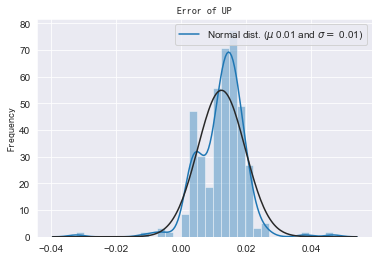

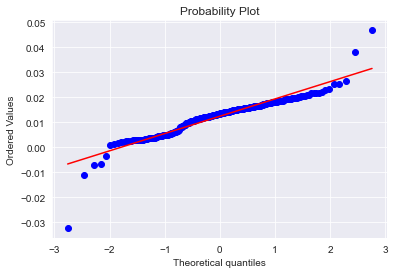


 mu = 0.09 and sigma = 0.06



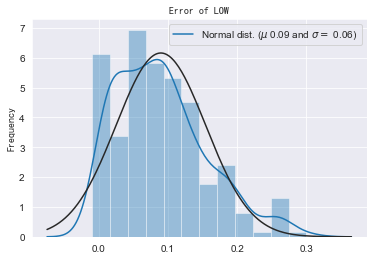

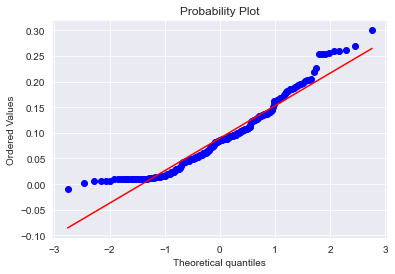

240 240 240 240


In [3]:
ex6()


 mu = 0.01 and sigma = 0.01



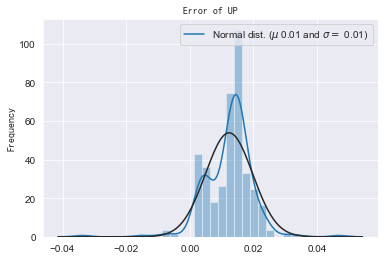

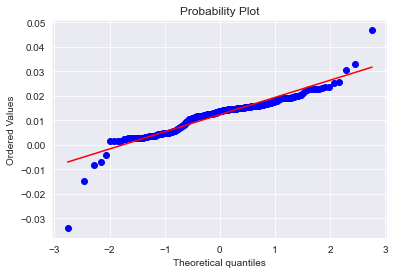


 mu = 0.09 and sigma = 0.07



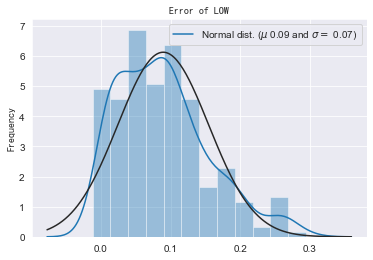

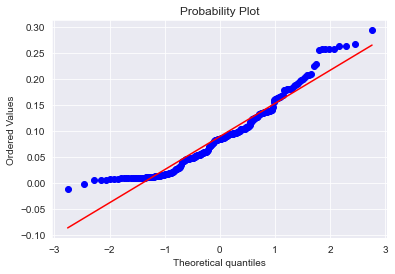

240 240 240 240

 mu = 0.01 and sigma = 0.01



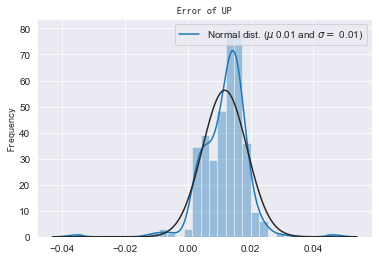

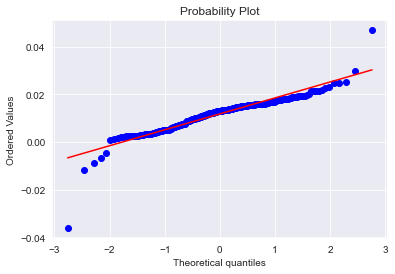


 mu = 0.09 and sigma = 0.06



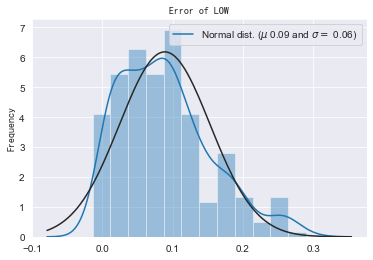

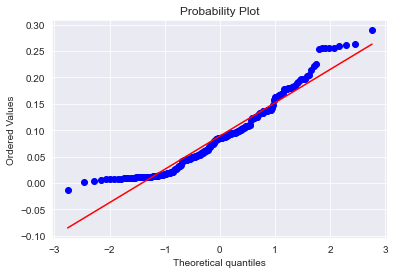

240 240 240 240


In [8]:
ex11()
ex12()

In [9]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
err_up = list()
err_low = list()
size_n = list()
size_m = list()
def x1():
    instances, up , low = loadData.dataLoading ("vrf_small")
    for index, instance in enumerate(instances):
        ig = GeneticAlgorithm(data = instance, 
                              max_generation = 100000, 
                              local_search = True, 
                              p = 20, 
                              cross_rate = 0.8, 
                              mute_rate = 0.15, 
                              mute_method = 'reverse')
        ig.eval(40000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_pop.best_makespan - up[index]) / up[index])
        err_low.append ((ig.best_pop.best_makespan - low[index]) / low[index])
        print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/GA_vrf_small_MG1e5_P20_CR80_MR15_RT40S.csv')

In [10]:
import math
import random
import numpy as np
from datetime import datetime, timedelta
from solver import Solver
from population import Population
import localSearch
from GeneticAlgorithm import GeneticAlgorithm
from Climb import Climb
from SimulatedAnnealing import SimulatedAnnealing
from chromes import initializeChromes, selectChromes, crossChromes, muteChromes
import loadData
import NEH
import selection
import chromes
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style ('darkgrid')
rc = {'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False}
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
err_up = list()
err_low = list()
size_n = list()
size_m = list()
def x2():
    instances, up , low = loadData.dataLoading ("vrf_small")
    for index, instance in enumerate(instances):
        ig = GeneticAlgorithm(data = instance, 
                              max_generation = 100000, 
                              local_search = True, 
                              p = 50, 
                              cross_rate = 0.8, 
                              mute_rate = 0.15, 
                              mute_method = 'reverse')
        ig.eval(40000)
        size_n.append (instance.shape[0])
        size_m.append (instance.shape[1])
        err_up.append ((ig.best_pop.best_makespan - up[index]) / up[index])
        err_low.append ((ig.best_pop.best_makespan - low[index]) / low[index])
        print (index, ig.iterations)
        #print("Best makespan", ig.best_solver.makespan, ig.iterations)
        #print("Job permutation:", ig.best_solver.permutation)
    ERR_up = np.array (err_up)
    sns.distplot (err_up, fit = norm)
    (mu, sigma) = norm.fit (ERR_up)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of UP', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_up, plot = plt)
    plt.show ()
    ERR_low = np.array (err_low)
    sns.distplot (ERR_low, fit = norm)
    (mu, sigma) = norm.fit (ERR_low)
    print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format (mu, sigma))
    plt.legend (['Normal dist. ($\mu$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)], loc = 'best')
    plt.ylabel ('Frequency', fontproperties='SimHei')
    plt.title ('Error of LOW', fontproperties='SimHei')

    fig = plt.figure()
    res = stats.probplot (ERR_low, plot = plt)
    plt.show ()
    print (len(err_up), len(err_low), len(size_n), len(size_m))
    data = pd.DataFrame ({'err_up': err_up, 'err_low' : err_low, 'n' : size_n, 'm' : size_m})
    data.to_csv ('results/GA_vrf_small_MG1e5_P50_CR80_MR15_RT40S.csv')

BEST 1099
0 17672
BEST 1097
1 18473
BEST 1146
2 19104
BEST 1124
3 17426
BEST 1038
4 17030
BEST 1105
5 19455
BEST 1085
6 18592
BEST 1115
7 17906
BEST 1121
8 18124
BEST 1045
9 18780
BEST 1474
10 16093
BEST 1309
11 15817
BEST 1400
12 14509
BEST 1412
13 16334
BEST 1452
14 17444
BEST 1373
15 16070
BEST 1329
16 15746
BEST 1445
17 16121
BEST 1443
18 17489
BEST 1428
19 15420
BEST 1663
20 14075
BEST 1652
21 14723
BEST 1761
22 15356
BEST 1731
23 15275
BEST 1678
24 14891
BEST 1700
25 15835
BEST 1889
26 15236
BEST 1683
27 14389
BEST 1655
28 15995
BEST 1706
29 15267
BEST 664
30 20113
BEST 695
31 20631
BEST 698
32 22527
BEST 728
33 21603
BEST 697
34 21000
BEST 713
35 19197
BEST 748
36 20316
BEST 729
37 22110
BEST 683
38 20194
BEST 761
39 19891
BEST 1539
40 8359
BEST 1592
41 8070
BEST 1579
42 7613
BEST 1635
43 8314
BEST 1489
44 7846
BEST 1626
45 8084
BEST 1627
46 7488
BEST 1646
47 7924
BEST 1598
48 8319
BEST 1566
49 7583
BEST 1914
50 6472
BEST 1964
51 6636
BEST 1940
52 6412
BEST 1807
53 6200
BEST 187

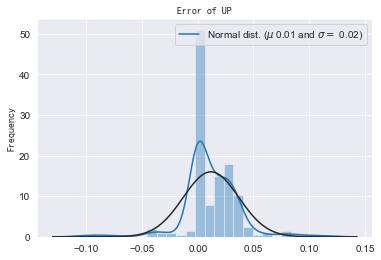

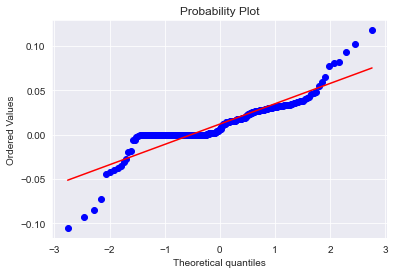


 mu = 0.17 and sigma = 0.11



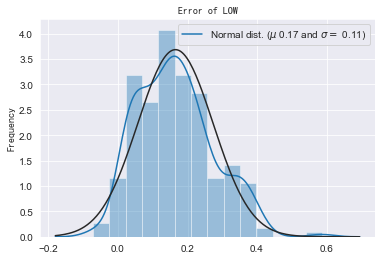

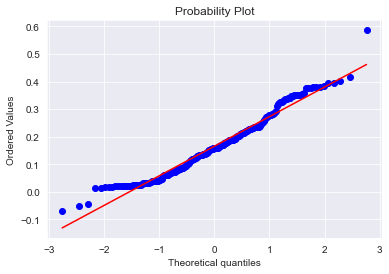

240 240 240 240
BEST 1099
0 7406
BEST 1097
1 7232
BEST 1146
2 7614
BEST 1124
3 7707
BEST 1038
4 7218
BEST 1098
5 7540
BEST 1085
6 7362
BEST 1115
7 7781
BEST 1113
8 7519
BEST 1045
9 7158
BEST 1462
10 6380
BEST 1307
11 6991
BEST 1402
12 6511
BEST 1398
13 6431
BEST 1452
14 6565
BEST 1373
15 6446
BEST 1329
16 6897
BEST 1445
17 6915
BEST 1443
18 6733
BEST 1428
19 6164
BEST 1663
20 5729
BEST 1652
21 5983
BEST 1761
22 5686
BEST 1726
23 6262
BEST 1678
24 5868
BEST 1700
25 6354
BEST 1889
26 6176
BEST 1678
27 5851
BEST 1655
28 6001
BEST 1706
29 5981
BEST 664
30 8587
BEST 695
31 8358
BEST 698
32 8686
BEST 728
33 8445
BEST 697
34 8884
BEST 713
35 7958
BEST 748
36 7907
BEST 728
37 8375
BEST 683
38 8277
BEST 761
39 8462
BEST 1557
40 3194
BEST 1566
41 3122
BEST 1574
42 3126
BEST 1602
43 3312
BEST 1501
44 3088
BEST 1648
45 3152
BEST 1620
46 3066
BEST 1599
47 3267
BEST 1580
48 3315
BEST 1563
49 2945
BEST 1896
50 2547
BEST 1987
51 2506
BEST 1933
52 2664
BEST 1831
53 2626
BEST 1855
54 2596
BEST 1891
55 2

KeyboardInterrupt: 

In [11]:
x1()
x2()